## Витік

Спектральний витік — ефект спотворення спектру, що проявляється в тому, що частина енергії на одній частоті з’являється на іншій частоті (зазвичай поблизу).

Давайте подивимося на вплив витоку на синусоїдний сигнал (який містить лише одну частотну складову).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from thinkdsp import SinSignal

signal = SinSignal(freq=440)

Якщо тривалість є цілим числом, кратним періоду, початок і кінець сегмента збігаються, і ми отримуємо мінімальний витік.

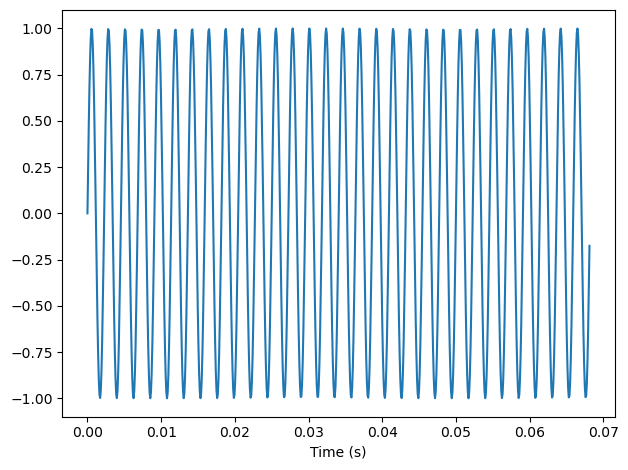

In [3]:
duration = signal.period * 30
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

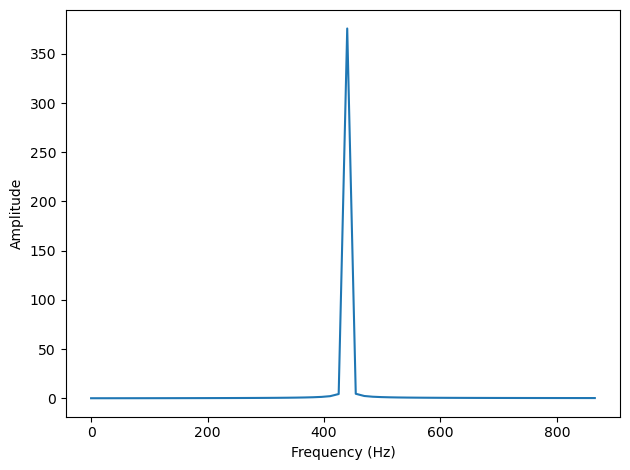

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Якщо тривалість не кратна періоду, витік досить поганий.

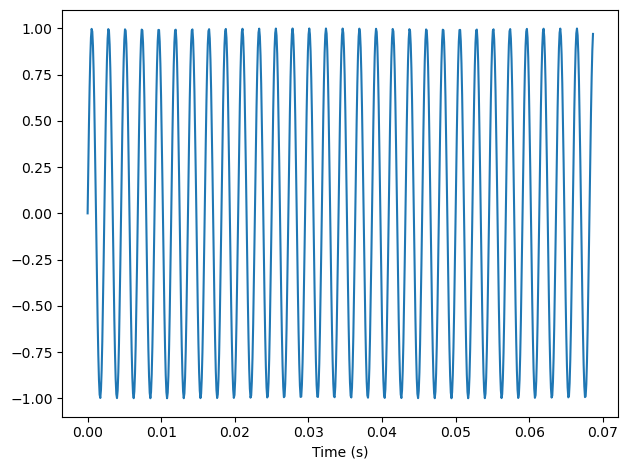

In [5]:
duration = signal.period * 30.25
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

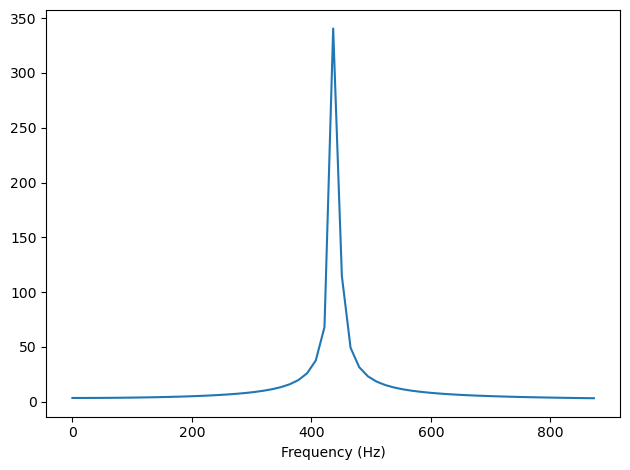

In [6]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

Визначимо і застосуємо віконну функцію

In [7]:
def rect(npoints):
    win_func = np.ones(npoints)
    return win_func

In [8]:
def triangle(npoints):
    length_2 = npoints / 2
    npoints_2 = npoints / 2
    win_func = np.ones(npoints)
    for num in range(npoints) :
        win_func[num] = 1 - abs((num - npoints_2) / length_2)
    return win_func
    

In [9]:
def hann(npoints):
    win_func = np.ones(npoints)
    for num in range(npoints) :
        win_func[num] = np.sin(np.pi * num / npoints) ** 2
    return win_func

In [10]:
def hamming(npoints):
    win_func = np.ones(npoints)
    a_0 = 25/46
    a_1 = 1 - a_0
    two_pi = 2 * np.pi
    for num in range(npoints) :
        win_func[num] = a_0 - a_1 * np.cos(two_pi * num / npoints)
    return win_func

In [11]:
def flat_top(npoints):
    win_func = np.ones(npoints)
    a_0 = 0.21557895
    a_1 = 0.41663158
    a_2 = 0.277263158
    a_3 = 0.083578947
    a_4 = 0.006947358
    for num in range(npoints) :
        win_func[num] = a_0 - \
          a_1 * np.cos(2*np.pi * num / npoints) + \
          a_2 * np.cos(4*np.pi * num / npoints) - \
          a_3 * np.cos(6*np.pi * num / npoints) + \
          a_4 * np.cos(8*np.pi * num / npoints)
    return win_func

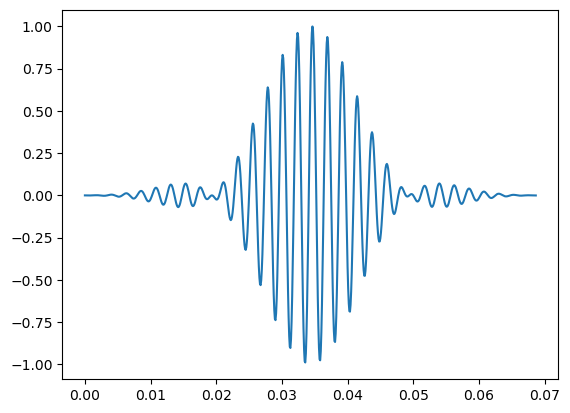

In [12]:
npoints = len(wave.ys)
# win_func = rect(npoints)
# win_func = triangle(npoints)
# win_func = hann(npoints)
# win_func = hamming(npoints)
win_func = flat_top(npoints)
wave_n = wave.copy()
wave_n.window(win_func)
wave_n.plot()

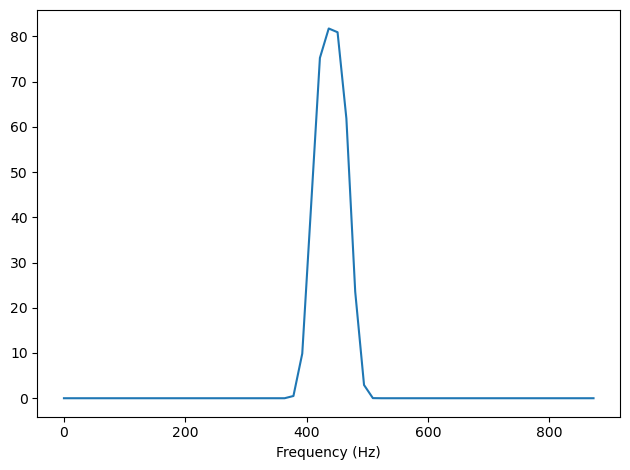

In [13]:
spectrum = wave_n.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')